<a href="https://colab.research.google.com/github/haggishm/fashion_MNIST_keras/blob/master/fashion_mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import fashion_mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam

Using TensorFlow backend.


In [3]:
def load_data():
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 784)


In [0]:
def adam_optimizer():
    return adam(lr=0.0002, beta_1=0.5)

In [6]:
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator
g=create_generator()
g.summary()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_____________________

In [11]:
def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator
d =create_discriminator()
d.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)              

In [12]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan
gan = create_gan(d,g)
gan.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_5 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [0]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 1


  3%|▎         | 4/128 [00:00<00:03, 38.22it/s]

Epoch 2


  4%|▍         | 5/128 [00:00<00:02, 43.03it/s]

Epoch 3


  4%|▍         | 5/128 [00:00<00:02, 42.89it/s]

Epoch 4


  4%|▍         | 5/128 [00:00<00:02, 43.09it/s]

Epoch 5


  4%|▍         | 5/128 [00:00<00:02, 42.64it/s]

Epoch 6


  3%|▎         | 4/128 [00:00<00:03, 36.94it/s]

Epoch 7


  4%|▍         | 5/128 [00:00<00:02, 42.73it/s]

Epoch 8


  4%|▍         | 5/128 [00:00<00:02, 42.31it/s]

Epoch 9


  4%|▍         | 5/128 [00:00<00:02, 42.61it/s]

Epoch 10


  4%|▍         | 5/128 [00:00<00:03, 40.42it/s]

Epoch 11


  4%|▍         | 5/128 [00:00<00:02, 41.24it/s]

Epoch 12


  4%|▍         | 5/128 [00:00<00:02, 42.40it/s]

Epoch 13


  4%|▍         | 5/128 [00:00<00:02, 42.67it/s]

Epoch 14


  4%|▍         | 5/128 [00:00<00:02, 41.28it/s]

Epoch 15


  3%|▎         | 4/128 [00:00<00:03, 38.67it/s]

Epoch 16


  4%|▍         | 5/128 [00:00<00:02, 42.48it/s]

Epoch 17


  4%|▍         | 5/128 [00:00<00:02, 42.40it/s]

Epoch 18


  4%|▍         | 5/128 [00:00<00:02, 43.34it/s]

Epoch 19


  4%|▍         | 5/128 [00:00<00:02, 43.51it/s]

Epoch 20


  3%|▎         | 4/128 [00:00<00:03, 38.17it/s]

Epoch 21


  4%|▍         | 5/128 [00:00<00:02, 41.59it/s]

Epoch 22


  4%|▍         | 5/128 [00:00<00:03, 40.97it/s]

Epoch 23


  4%|▍         | 5/128 [00:00<00:02, 42.66it/s]

Epoch 24


  4%|▍         | 5/128 [00:00<00:02, 42.03it/s]

Epoch 25


  4%|▍         | 5/128 [00:00<00:02, 41.44it/s]

Epoch 26


  4%|▍         | 5/128 [00:00<00:02, 42.10it/s]

Epoch 27


  4%|▍         | 5/128 [00:00<00:03, 40.55it/s]

Epoch 28


  4%|▍         | 5/128 [00:00<00:02, 41.30it/s]

Epoch 29


  4%|▍         | 5/128 [00:00<00:03, 40.79it/s]

Epoch 30


  4%|▍         | 5/128 [00:00<00:02, 41.12it/s]

Epoch 31


  3%|▎         | 4/128 [00:00<00:03, 39.62it/s]

Epoch 32


  4%|▍         | 5/128 [00:00<00:02, 42.05it/s]

Epoch 33


  4%|▍         | 5/128 [00:00<00:03, 40.96it/s]

Epoch 34


  4%|▍         | 5/128 [00:00<00:02, 42.75it/s]

Epoch 35


  4%|▍         | 5/128 [00:00<00:02, 42.80it/s]

Epoch 36


  4%|▍         | 5/128 [00:00<00:02, 42.02it/s]

Epoch 37


  4%|▍         | 5/128 [00:00<00:02, 41.91it/s]

Epoch 38


  4%|▍         | 5/128 [00:00<00:02, 42.76it/s]

Epoch 39


  4%|▍         | 5/128 [00:00<00:02, 42.81it/s]

Epoch 40


  3%|▎         | 4/128 [00:00<00:03, 40.00it/s]

Epoch 41


  4%|▍         | 5/128 [00:00<00:03, 40.84it/s]

Epoch 42


  4%|▍         | 5/128 [00:00<00:02, 41.07it/s]

Epoch 43


  3%|▎         | 4/128 [00:00<00:03, 39.36it/s]

Epoch 44


  4%|▍         | 5/128 [00:00<00:02, 41.49it/s]

Epoch 45


  4%|▍         | 5/128 [00:00<00:02, 42.68it/s]

Epoch 46


  3%|▎         | 4/128 [00:00<00:03, 38.61it/s]

Epoch 47


  3%|▎         | 4/128 [00:00<00:03, 38.31it/s]

Epoch 48


  4%|▍         | 5/128 [00:00<00:02, 42.44it/s]

Epoch 49


  4%|▍         | 5/128 [00:00<00:03, 40.23it/s]

Epoch 50


  4%|▍         | 5/128 [00:00<00:02, 41.93it/s]

Epoch 51


  4%|▍         | 5/128 [00:00<00:03, 40.87it/s]

Epoch 52


  4%|▍         | 5/128 [00:00<00:02, 42.86it/s]

Epoch 53


  4%|▍         | 5/128 [00:00<00:02, 42.05it/s]

Epoch 54


  4%|▍         | 5/128 [00:00<00:02, 41.82it/s]

Epoch 55


  4%|▍         | 5/128 [00:00<00:02, 42.50it/s]

Epoch 56


  4%|▍         | 5/128 [00:00<00:02, 42.60it/s]

Epoch 57


  4%|▍         | 5/128 [00:00<00:02, 41.74it/s]

Epoch 58


  3%|▎         | 4/128 [00:00<00:03, 39.77it/s]

Epoch 59


  4%|▍         | 5/128 [00:00<00:02, 42.13it/s]

Epoch 60


  3%|▎         | 4/128 [00:00<00:03, 37.38it/s]

Epoch 61


  4%|▍         | 5/128 [00:00<00:03, 40.59it/s]

Epoch 62


  3%|▎         | 4/128 [00:00<00:03, 39.91it/s]

Epoch 63


  4%|▍         | 5/128 [00:00<00:02, 42.53it/s]

Epoch 64


  3%|▎         | 4/128 [00:00<00:03, 39.82it/s]

Epoch 65


  4%|▍         | 5/128 [00:00<00:02, 41.11it/s]

Epoch 66


  4%|▍         | 5/128 [00:00<00:02, 42.29it/s]

Epoch 67


  4%|▍         | 5/128 [00:00<00:02, 43.02it/s]

Epoch 68


  4%|▍         | 5/128 [00:00<00:02, 41.29it/s]

Epoch 69


  4%|▍         | 5/128 [00:00<00:02, 42.18it/s]

Epoch 70


  4%|▍         | 5/128 [00:00<00:02, 42.32it/s]

Epoch 71


  4%|▍         | 5/128 [00:00<00:02, 42.02it/s]

Epoch 72


  4%|▍         | 5/128 [00:00<00:03, 39.76it/s]

Epoch 73


  3%|▎         | 4/128 [00:00<00:03, 39.74it/s]

Epoch 74


  4%|▍         | 5/128 [00:00<00:02, 42.73it/s]

Epoch 75


  4%|▍         | 5/128 [00:00<00:02, 43.07it/s]

Epoch 76


  4%|▍         | 5/128 [00:00<00:02, 43.06it/s]

Epoch 77


  3%|▎         | 4/128 [00:00<00:03, 39.58it/s]

Epoch 78


  4%|▍         | 5/128 [00:00<00:02, 42.59it/s]

Epoch 79


  4%|▍         | 5/128 [00:00<00:02, 43.05it/s]

Epoch 80


  3%|▎         | 4/128 [00:00<00:03, 39.33it/s]

Epoch 81


  4%|▍         | 5/128 [00:00<00:03, 40.64it/s]

Epoch 82


  4%|▍         | 5/128 [00:00<00:02, 42.25it/s]

Epoch 83


  4%|▍         | 5/128 [00:00<00:02, 42.06it/s]

Epoch 84


  4%|▍         | 5/128 [00:00<00:02, 43.86it/s]

Epoch 85


  4%|▍         | 5/128 [00:00<00:03, 40.71it/s]

Epoch 86


  4%|▍         | 5/128 [00:00<00:03, 40.88it/s]

Epoch 87


  4%|▍         | 5/128 [00:00<00:02, 41.59it/s]

Epoch 88


  4%|▍         | 5/128 [00:00<00:02, 41.04it/s]

Epoch 89


  4%|▍         | 5/128 [00:00<00:02, 41.62it/s]

Epoch 90


  4%|▍         | 5/128 [00:00<00:03, 40.97it/s]

Epoch 91


  4%|▍         | 5/128 [00:00<00:03, 40.97it/s]

Epoch 92


  4%|▍         | 5/128 [00:00<00:02, 42.91it/s]

Epoch 93


  3%|▎         | 4/128 [00:00<00:03, 39.32it/s]

Epoch 94


  4%|▍         | 5/128 [00:00<00:02, 42.53it/s]

Epoch 95


  4%|▍         | 5/128 [00:00<00:02, 41.73it/s]

Epoch 96


  4%|▍         | 5/128 [00:00<00:02, 42.78it/s]

Epoch 97


  3%|▎         | 4/128 [00:00<00:03, 38.84it/s]

Epoch 98


  4%|▍         | 5/128 [00:00<00:02, 42.13it/s]

Epoch 99


  4%|▍         | 5/128 [00:00<00:02, 42.56it/s]

Epoch 100


  3%|▎         | 4/128 [00:00<00:03, 39.19it/s]

Epoch 101


  4%|▍         | 5/128 [00:00<00:02, 42.87it/s]

Epoch 102


  4%|▍         | 5/128 [00:00<00:02, 42.43it/s]

Epoch 103


  4%|▍         | 5/128 [00:00<00:02, 41.10it/s]

Epoch 104


  4%|▍         | 5/128 [00:00<00:02, 42.21it/s]

Epoch 105


  3%|▎         | 4/128 [00:00<00:03, 33.19it/s]

Epoch 106


  4%|▍         | 5/128 [00:00<00:02, 42.50it/s]

Epoch 107


  4%|▍         | 5/128 [00:00<00:02, 41.36it/s]

Epoch 108


  4%|▍         | 5/128 [00:00<00:02, 42.55it/s]

Epoch 109


  4%|▍         | 5/128 [00:00<00:02, 41.12it/s]

Epoch 110


  3%|▎         | 4/128 [00:00<00:03, 39.45it/s]

Epoch 111


  3%|▎         | 4/128 [00:00<00:03, 39.74it/s]

Epoch 112


  4%|▍         | 5/128 [00:00<00:02, 43.25it/s]

Epoch 113


  4%|▍         | 5/128 [00:00<00:03, 39.66it/s]

Epoch 114


  3%|▎         | 4/128 [00:00<00:03, 36.13it/s]

Epoch 115


  4%|▍         | 5/128 [00:00<00:02, 42.28it/s]

Epoch 116


  3%|▎         | 4/128 [00:00<00:03, 39.45it/s]

Epoch 117


  4%|▍         | 5/128 [00:00<00:02, 42.41it/s]

Epoch 118


  3%|▎         | 4/128 [00:00<00:03, 38.10it/s]

Epoch 119


  4%|▍         | 5/128 [00:00<00:02, 42.60it/s]

Epoch 120


  3%|▎         | 4/128 [00:00<00:03, 36.82it/s]

Epoch 121


  4%|▍         | 5/128 [00:00<00:03, 40.00it/s]

Epoch 122


  4%|▍         | 5/128 [00:00<00:03, 40.99it/s]

Epoch 123


  4%|▍         | 5/128 [00:00<00:02, 41.48it/s]

Epoch 124


  4%|▍         | 5/128 [00:00<00:02, 42.70it/s]

Epoch 125


  3%|▎         | 4/128 [00:00<00:03, 38.74it/s]

Epoch 126


  4%|▍         | 5/128 [00:00<00:02, 42.77it/s]

Epoch 127


  4%|▍         | 5/128 [00:00<00:02, 41.88it/s]

Epoch 128


  4%|▍         | 5/128 [00:00<00:02, 42.39it/s]

Epoch 129


  4%|▍         | 5/128 [00:00<00:02, 43.17it/s]

Epoch 130


  4%|▍         | 5/128 [00:00<00:02, 41.83it/s]

Epoch 131


  4%|▍         | 5/128 [00:00<00:02, 42.33it/s]

Epoch 132


  4%|▍         | 5/128 [00:00<00:02, 42.20it/s]

Epoch 133


  4%|▍         | 5/128 [00:00<00:02, 42.22it/s]

Epoch 134


  4%|▍         | 5/128 [00:00<00:02, 41.85it/s]

Epoch 135


  4%|▍         | 5/128 [00:00<00:02, 43.08it/s]

Epoch 136


  4%|▍         | 5/128 [00:00<00:02, 42.11it/s]

Epoch 137


  4%|▍         | 5/128 [00:00<00:02, 42.45it/s]

Epoch 138


  4%|▍         | 5/128 [00:00<00:02, 42.68it/s]

Epoch 139


  4%|▍         | 5/128 [00:00<00:02, 42.97it/s]

Epoch 140


  4%|▍         | 5/128 [00:00<00:02, 42.60it/s]

Epoch 141


  4%|▍         | 5/128 [00:00<00:02, 43.02it/s]

Epoch 142


  4%|▍         | 5/128 [00:00<00:02, 42.05it/s]

Epoch 143


  4%|▍         | 5/128 [00:00<00:02, 43.01it/s]

Epoch 144


  4%|▍         | 5/128 [00:00<00:02, 43.29it/s]

Epoch 145


  4%|▍         | 5/128 [00:00<00:02, 43.30it/s]

Epoch 146


  4%|▍         | 5/128 [00:00<00:02, 41.35it/s]

Epoch 147


  4%|▍         | 5/128 [00:00<00:02, 41.40it/s]

Epoch 148


  4%|▍         | 5/128 [00:00<00:02, 43.48it/s]

Epoch 149


  3%|▎         | 4/128 [00:00<00:03, 39.71it/s]

Epoch 150


  4%|▍         | 5/128 [00:00<00:02, 41.83it/s]

Epoch 151


  4%|▍         | 5/128 [00:00<00:02, 42.90it/s]

Epoch 152


  4%|▍         | 5/128 [00:00<00:02, 41.70it/s]

Epoch 153


  4%|▍         | 5/128 [00:00<00:02, 41.58it/s]

Epoch 154


  3%|▎         | 4/128 [00:00<00:03, 38.61it/s]

Epoch 155


  4%|▍         | 5/128 [00:00<00:02, 42.17it/s]

Epoch 156


  4%|▍         | 5/128 [00:00<00:02, 42.96it/s]

Epoch 157


  4%|▍         | 5/128 [00:00<00:03, 40.89it/s]

Epoch 158


  4%|▍         | 5/128 [00:00<00:03, 40.41it/s]

Epoch 159


  3%|▎         | 4/128 [00:00<00:03, 39.67it/s]

Epoch 160


  3%|▎         | 4/128 [00:00<00:03, 39.29it/s]

Epoch 161


  3%|▎         | 4/128 [00:00<00:03, 39.58it/s]

Epoch 162


  4%|▍         | 5/128 [00:00<00:02, 43.14it/s]

Epoch 163


  4%|▍         | 5/128 [00:00<00:02, 42.44it/s]

Epoch 164


  4%|▍         | 5/128 [00:00<00:02, 41.02it/s]

Epoch 165


  3%|▎         | 4/128 [00:00<00:03, 39.75it/s]

Epoch 166


  4%|▍         | 5/128 [00:00<00:03, 40.79it/s]

Epoch 167


  3%|▎         | 4/128 [00:00<00:03, 39.04it/s]

Epoch 168


  4%|▍         | 5/128 [00:00<00:02, 42.22it/s]

Epoch 169


  4%|▍         | 5/128 [00:00<00:03, 40.84it/s]

Epoch 170


  4%|▍         | 5/128 [00:00<00:02, 41.23it/s]

Epoch 171


  4%|▍         | 5/128 [00:00<00:03, 40.41it/s]

Epoch 172


  4%|▍         | 5/128 [00:00<00:02, 42.71it/s]

Epoch 173


  4%|▍         | 5/128 [00:00<00:02, 41.39it/s]

Epoch 174


  4%|▍         | 5/128 [00:00<00:02, 41.59it/s]

Epoch 175


  4%|▍         | 5/128 [00:00<00:02, 41.76it/s]

Epoch 176


  4%|▍         | 5/128 [00:00<00:02, 41.05it/s]

Epoch 177


  4%|▍         | 5/128 [00:00<00:02, 42.06it/s]

Epoch 178


  4%|▍         | 5/128 [00:00<00:02, 43.83it/s]

Epoch 179


  4%|▍         | 5/128 [00:00<00:02, 43.08it/s]

Epoch 180


  3%|▎         | 4/128 [00:00<00:03, 39.64it/s]

Epoch 181


  4%|▍         | 5/128 [00:00<00:03, 39.79it/s]

Epoch 182


  4%|▍         | 5/128 [00:00<00:02, 42.53it/s]

Epoch 183


  4%|▍         | 5/128 [00:00<00:02, 42.54it/s]

Epoch 184


  4%|▍         | 5/128 [00:00<00:03, 40.39it/s]

Epoch 185


  4%|▍         | 5/128 [00:00<00:02, 42.84it/s]

Epoch 186


  4%|▍         | 5/128 [00:00<00:02, 41.91it/s]

Epoch 187


  4%|▍         | 5/128 [00:00<00:02, 41.89it/s]

Epoch 188


  4%|▍         | 5/128 [00:00<00:03, 40.32it/s]

Epoch 189


  3%|▎         | 4/128 [00:00<00:03, 37.04it/s]

Epoch 190


  3%|▎         | 4/128 [00:00<00:03, 39.47it/s]

Epoch 191


  4%|▍         | 5/128 [00:00<00:02, 41.25it/s]

Epoch 192


  4%|▍         | 5/128 [00:00<00:03, 40.62it/s]

Epoch 193


  4%|▍         | 5/128 [00:00<00:02, 42.58it/s]

Epoch 194


  4%|▍         | 5/128 [00:00<00:02, 41.42it/s]

Epoch 195


  4%|▍         | 5/128 [00:00<00:02, 41.76it/s]

Epoch 196


  4%|▍         | 5/128 [00:00<00:02, 42.32it/s]

Epoch 197


  4%|▍         | 5/128 [00:00<00:02, 42.93it/s]

Epoch 198


  4%|▍         | 5/128 [00:00<00:02, 41.40it/s]

Epoch 199


  4%|▍         | 5/128 [00:00<00:02, 42.57it/s]

Epoch 200


  4%|▍         | 5/128 [00:00<00:02, 42.22it/s]

Epoch 201


  4%|▍         | 5/128 [00:00<00:02, 41.75it/s]

Epoch 202


  3%|▎         | 4/128 [00:00<00:03, 39.82it/s]

Epoch 203


  4%|▍         | 5/128 [00:00<00:02, 41.97it/s]

Epoch 204


  4%|▍         | 5/128 [00:00<00:02, 42.00it/s]

Epoch 205


  4%|▍         | 5/128 [00:00<00:02, 41.93it/s]

Epoch 206


  4%|▍         | 5/128 [00:00<00:02, 42.42it/s]

Epoch 207


  4%|▍         | 5/128 [00:00<00:03, 40.17it/s]

Epoch 208


  3%|▎         | 4/128 [00:00<00:03, 38.41it/s]

Epoch 209


  4%|▍         | 5/128 [00:00<00:02, 41.57it/s]

Epoch 210


  4%|▍         | 5/128 [00:00<00:03, 40.97it/s]

Epoch 211


  4%|▍         | 5/128 [00:00<00:02, 42.05it/s]

Epoch 212


  4%|▍         | 5/128 [00:00<00:02, 42.28it/s]

Epoch 213


  4%|▍         | 5/128 [00:00<00:03, 40.61it/s]

Epoch 214


  3%|▎         | 4/128 [00:00<00:03, 39.47it/s]

Epoch 215


  4%|▍         | 5/128 [00:00<00:03, 40.97it/s]

Epoch 216


  3%|▎         | 4/128 [00:00<00:03, 38.65it/s]

Epoch 217


  4%|▍         | 5/128 [00:00<00:03, 40.24it/s]

Epoch 218


  4%|▍         | 5/128 [00:00<00:02, 41.22it/s]

Epoch 219


  4%|▍         | 5/128 [00:00<00:02, 41.38it/s]

Epoch 220


  4%|▍         | 5/128 [00:00<00:03, 40.46it/s]

Epoch 221


  4%|▍         | 5/128 [00:00<00:02, 42.27it/s]

Epoch 222


  4%|▍         | 5/128 [00:00<00:02, 42.55it/s]

Epoch 223


  4%|▍         | 5/128 [00:00<00:02, 42.10it/s]

Epoch 224


  3%|▎         | 4/128 [00:00<00:03, 40.00it/s]

Epoch 225


  4%|▍         | 5/128 [00:00<00:02, 41.50it/s]

Epoch 226


  3%|▎         | 4/128 [00:00<00:03, 39.24it/s]

Epoch 227


  3%|▎         | 4/128 [00:00<00:03, 36.73it/s]

Epoch 228


  4%|▍         | 5/128 [00:00<00:02, 42.78it/s]

Epoch 229


  4%|▍         | 5/128 [00:00<00:02, 42.81it/s]

Epoch 230


  4%|▍         | 5/128 [00:00<00:02, 41.28it/s]

Epoch 231


  4%|▍         | 5/128 [00:00<00:02, 42.37it/s]

Epoch 232


  4%|▍         | 5/128 [00:00<00:02, 42.92it/s]

Epoch 233


  3%|▎         | 4/128 [00:00<00:03, 39.93it/s]

Epoch 234


  4%|▍         | 5/128 [00:00<00:02, 41.03it/s]

Epoch 235


  4%|▍         | 5/128 [00:00<00:03, 40.83it/s]

Epoch 236


  4%|▍         | 5/128 [00:00<00:03, 40.85it/s]

Epoch 237


  4%|▍         | 5/128 [00:00<00:02, 42.88it/s]

Epoch 238


  4%|▍         | 5/128 [00:00<00:02, 41.97it/s]

Epoch 239


  4%|▍         | 5/128 [00:00<00:02, 42.87it/s]

Epoch 240


  4%|▍         | 5/128 [00:00<00:02, 42.53it/s]

Epoch 241


  4%|▍         | 5/128 [00:00<00:02, 42.96it/s]

Epoch 242


  4%|▍         | 5/128 [00:00<00:02, 42.47it/s]

Epoch 243


  4%|▍         | 5/128 [00:00<00:02, 43.35it/s]

Epoch 244


  4%|▍         | 5/128 [00:00<00:02, 41.39it/s]

Epoch 245


  4%|▍         | 5/128 [00:00<00:02, 41.63it/s]

Epoch 246


  4%|▍         | 5/128 [00:00<00:02, 42.18it/s]

Epoch 247


  4%|▍         | 5/128 [00:00<00:02, 42.13it/s]

Epoch 248


  4%|▍         | 5/128 [00:00<00:02, 42.40it/s]

Epoch 249


  4%|▍         | 5/128 [00:00<00:02, 42.29it/s]

Epoch 250


  3%|▎         | 4/128 [00:00<00:03, 39.45it/s]

Epoch 251


  4%|▍         | 5/128 [00:00<00:02, 42.90it/s]

Epoch 252


  4%|▍         | 5/128 [00:00<00:02, 41.56it/s]

Epoch 253


  4%|▍         | 5/128 [00:00<00:02, 42.01it/s]

Epoch 254


  4%|▍         | 5/128 [00:00<00:02, 41.03it/s]

Epoch 255


  3%|▎         | 4/128 [00:00<00:03, 39.14it/s]

Epoch 256


  3%|▎         | 4/128 [00:00<00:03, 39.64it/s]

Epoch 257


  3%|▎         | 4/128 [00:00<00:03, 39.95it/s]

Epoch 258


  3%|▎         | 4/128 [00:00<00:03, 39.49it/s]

Epoch 259


  4%|▍         | 5/128 [00:00<00:02, 42.20it/s]

Epoch 260


  3%|▎         | 4/128 [00:00<00:03, 39.04it/s]

Epoch 261


  4%|▍         | 5/128 [00:00<00:02, 41.02it/s]

Epoch 262


  4%|▍         | 5/128 [00:00<00:03, 40.99it/s]

Epoch 263


  4%|▍         | 5/128 [00:00<00:02, 41.34it/s]

Epoch 264


  3%|▎         | 4/128 [00:00<00:03, 39.21it/s]

Epoch 265


  3%|▎         | 4/128 [00:00<00:03, 39.70it/s]

Epoch 266


  4%|▍         | 5/128 [00:00<00:02, 41.40it/s]

Epoch 267


  4%|▍         | 5/128 [00:00<00:02, 41.16it/s]

Epoch 268


  4%|▍         | 5/128 [00:00<00:02, 41.73it/s]

Epoch 269


  4%|▍         | 5/128 [00:00<00:02, 42.76it/s]

Epoch 270


  4%|▍         | 5/128 [00:00<00:02, 41.81it/s]

Epoch 271


  4%|▍         | 5/128 [00:00<00:03, 40.49it/s]

Epoch 272


  4%|▍         | 5/128 [00:00<00:02, 42.46it/s]

Epoch 273


  4%|▍         | 5/128 [00:00<00:02, 42.09it/s]

Epoch 274


  4%|▍         | 5/128 [00:00<00:02, 41.29it/s]

Epoch 275


  4%|▍         | 5/128 [00:00<00:02, 42.11it/s]

Epoch 276


  4%|▍         | 5/128 [00:00<00:02, 43.31it/s]

Epoch 277


  3%|▎         | 4/128 [00:00<00:03, 39.29it/s]

Epoch 278


  4%|▍         | 5/128 [00:00<00:02, 42.59it/s]

Epoch 279


  4%|▍         | 5/128 [00:00<00:02, 42.64it/s]

Epoch 280


  4%|▍         | 5/128 [00:00<00:02, 41.01it/s]

Epoch 281


  3%|▎         | 4/128 [00:00<00:03, 39.57it/s]

Epoch 282


  4%|▍         | 5/128 [00:00<00:02, 42.96it/s]

Epoch 283


  4%|▍         | 5/128 [00:00<00:02, 42.14it/s]

Epoch 284


  4%|▍         | 5/128 [00:00<00:02, 41.28it/s]

Epoch 285


  4%|▍         | 5/128 [00:00<00:02, 42.91it/s]

Epoch 286


  3%|▎         | 4/128 [00:00<00:03, 37.92it/s]

Epoch 287


  4%|▍         | 5/128 [00:00<00:02, 43.17it/s]

Epoch 288


  4%|▍         | 5/128 [00:00<00:02, 43.24it/s]

Epoch 289


  4%|▍         | 5/128 [00:00<00:02, 42.73it/s]

Epoch 290


  4%|▍         | 5/128 [00:00<00:02, 42.74it/s]

Epoch 291


  4%|▍         | 5/128 [00:00<00:02, 42.90it/s]

Epoch 292


  4%|▍         | 5/128 [00:00<00:02, 42.16it/s]

Epoch 293


  4%|▍         | 5/128 [00:00<00:02, 42.98it/s]

Epoch 294


  3%|▎         | 4/128 [00:00<00:03, 38.99it/s]

Epoch 295


  4%|▍         | 5/128 [00:00<00:02, 41.71it/s]

Epoch 296


  4%|▍         | 5/128 [00:00<00:02, 42.54it/s]

Epoch 297


  4%|▍         | 5/128 [00:00<00:02, 41.93it/s]

Epoch 298


  4%|▍         | 5/128 [00:00<00:02, 42.93it/s]

Epoch 299


  4%|▍         | 5/128 [00:00<00:02, 43.83it/s]

Epoch 300


  3%|▎         | 4/128 [00:00<00:03, 36.30it/s]

Epoch 301


  3%|▎         | 4/128 [00:00<00:03, 39.18it/s]

Epoch 302


  4%|▍         | 5/128 [00:00<00:03, 40.73it/s]

Epoch 303


  4%|▍         | 5/128 [00:00<00:02, 41.41it/s]

Epoch 304


  3%|▎         | 4/128 [00:00<00:03, 39.08it/s]

Epoch 305


  4%|▍         | 5/128 [00:00<00:02, 41.81it/s]

Epoch 306


  4%|▍         | 5/128 [00:00<00:03, 40.83it/s]

Epoch 307


  4%|▍         | 5/128 [00:00<00:02, 41.57it/s]

Epoch 308


  4%|▍         | 5/128 [00:00<00:02, 41.74it/s]

Epoch 309


  4%|▍         | 5/128 [00:00<00:03, 40.76it/s]

Epoch 310


  4%|▍         | 5/128 [00:00<00:02, 41.80it/s]

Epoch 311


  3%|▎         | 4/128 [00:00<00:03, 39.77it/s]

Epoch 312


  4%|▍         | 5/128 [00:00<00:02, 42.08it/s]

Epoch 313


  4%|▍         | 5/128 [00:00<00:02, 42.68it/s]

Epoch 314


  4%|▍         | 5/128 [00:00<00:02, 43.23it/s]

Epoch 315


  4%|▍         | 5/128 [00:00<00:02, 41.25it/s]

Epoch 316


  4%|▍         | 5/128 [00:00<00:02, 42.42it/s]

Epoch 317


  4%|▍         | 5/128 [00:00<00:02, 42.06it/s]

Epoch 318


  4%|▍         | 5/128 [00:00<00:02, 43.51it/s]

Epoch 319


  4%|▍         | 5/128 [00:00<00:02, 43.29it/s]

Epoch 320


  4%|▍         | 5/128 [00:00<00:03, 40.87it/s]

Epoch 321


  4%|▍         | 5/128 [00:00<00:02, 42.42it/s]

Epoch 322


  4%|▍         | 5/128 [00:00<00:02, 43.29it/s]

Epoch 323


  4%|▍         | 5/128 [00:00<00:02, 44.36it/s]

Epoch 324


  4%|▍         | 5/128 [00:00<00:02, 41.31it/s]

Epoch 325


  4%|▍         | 5/128 [00:00<00:02, 42.81it/s]

Epoch 326


  4%|▍         | 5/128 [00:00<00:02, 43.78it/s]

Epoch 327


  4%|▍         | 5/128 [00:00<00:02, 41.91it/s]

Epoch 328


  4%|▍         | 5/128 [00:00<00:02, 42.13it/s]

Epoch 329


  4%|▍         | 5/128 [00:00<00:02, 42.80it/s]

Epoch 330


  4%|▍         | 5/128 [00:00<00:02, 42.94it/s]

Epoch 331


  4%|▍         | 5/128 [00:00<00:02, 42.52it/s]

Epoch 332


  4%|▍         | 5/128 [00:00<00:02, 43.28it/s]

Epoch 333


  4%|▍         | 5/128 [00:00<00:02, 42.73it/s]

Epoch 334


  4%|▍         | 5/128 [00:00<00:02, 42.33it/s]

Epoch 335


  4%|▍         | 5/128 [00:00<00:02, 41.53it/s]

Epoch 336


  4%|▍         | 5/128 [00:00<00:02, 41.81it/s]

Epoch 337


  4%|▍         | 5/128 [00:00<00:02, 42.45it/s]

Epoch 338


  4%|▍         | 5/128 [00:00<00:02, 43.63it/s]

Epoch 339


  4%|▍         | 5/128 [00:00<00:02, 41.43it/s]

Epoch 340


  3%|▎         | 4/128 [00:00<00:03, 39.73it/s]

Epoch 341


  4%|▍         | 5/128 [00:00<00:02, 43.25it/s]

Epoch 342


  4%|▍         | 5/128 [00:00<00:02, 44.00it/s]

Epoch 343


  4%|▍         | 5/128 [00:00<00:02, 42.48it/s]

Epoch 344


  4%|▍         | 5/128 [00:00<00:02, 42.82it/s]

Epoch 345


  4%|▍         | 5/128 [00:00<00:02, 42.95it/s]

Epoch 346


  4%|▍         | 5/128 [00:00<00:02, 42.34it/s]

Epoch 347


  4%|▍         | 5/128 [00:00<00:02, 43.86it/s]

Epoch 348


  4%|▍         | 5/128 [00:00<00:02, 43.09it/s]

Epoch 349


  4%|▍         | 5/128 [00:00<00:02, 43.45it/s]

Epoch 350


  4%|▍         | 5/128 [00:00<00:02, 41.03it/s]

Epoch 351


  4%|▍         | 5/128 [00:00<00:02, 43.12it/s]

Epoch 352


  4%|▍         | 5/128 [00:00<00:03, 40.87it/s]

Epoch 353


  4%|▍         | 5/128 [00:00<00:02, 43.43it/s]

Epoch 354


  4%|▍         | 5/128 [00:00<00:02, 42.83it/s]

Epoch 355


  4%|▍         | 5/128 [00:00<00:02, 42.96it/s]

Epoch 356


  4%|▍         | 5/128 [00:00<00:02, 42.86it/s]

Epoch 357


  4%|▍         | 5/128 [00:00<00:02, 41.69it/s]

Epoch 358


  4%|▍         | 5/128 [00:00<00:02, 41.33it/s]

Epoch 359


  4%|▍         | 5/128 [00:00<00:02, 42.08it/s]

Epoch 360


  3%|▎         | 4/128 [00:00<00:03, 39.67it/s]

Epoch 361


  4%|▍         | 5/128 [00:00<00:02, 43.18it/s]

Epoch 362


  4%|▍         | 5/128 [00:00<00:02, 43.25it/s]

Epoch 363


  4%|▍         | 5/128 [00:00<00:02, 43.24it/s]

Epoch 364


  4%|▍         | 5/128 [00:00<00:02, 42.65it/s]

Epoch 365


  4%|▍         | 5/128 [00:00<00:02, 41.90it/s]

Epoch 366


  4%|▍         | 5/128 [00:00<00:02, 42.12it/s]

Epoch 367


  4%|▍         | 5/128 [00:00<00:02, 42.65it/s]

Epoch 368


  4%|▍         | 5/128 [00:00<00:02, 42.85it/s]

Epoch 369


  4%|▍         | 5/128 [00:00<00:02, 43.76it/s]

Epoch 370


  4%|▍         | 5/128 [00:00<00:02, 42.55it/s]

Epoch 371


  4%|▍         | 5/128 [00:00<00:02, 43.30it/s]

Epoch 372


  4%|▍         | 5/128 [00:00<00:02, 42.65it/s]

Epoch 373


  4%|▍         | 5/128 [00:00<00:02, 41.46it/s]

Epoch 374


  4%|▍         | 5/128 [00:00<00:02, 42.63it/s]

Epoch 375


  4%|▍         | 5/128 [00:00<00:02, 42.38it/s]

Epoch 376


  4%|▍         | 5/128 [00:00<00:02, 41.18it/s]

Epoch 377


  4%|▍         | 5/128 [00:00<00:02, 42.86it/s]

Epoch 378


  4%|▍         | 5/128 [00:00<00:02, 43.65it/s]

Epoch 379


  4%|▍         | 5/128 [00:00<00:02, 44.25it/s]

Epoch 380


  4%|▍         | 5/128 [00:00<00:02, 41.09it/s]

Epoch 381


  4%|▍         | 5/128 [00:00<00:02, 43.23it/s]

Epoch 382


  4%|▍         | 5/128 [00:00<00:02, 41.82it/s]

Epoch 383


  4%|▍         | 5/128 [00:00<00:02, 43.00it/s]

Epoch 384


  4%|▍         | 5/128 [00:00<00:02, 41.75it/s]

Epoch 385


  4%|▍         | 5/128 [00:00<00:02, 42.25it/s]

Epoch 386


  4%|▍         | 5/128 [00:00<00:02, 43.54it/s]

Epoch 387


  4%|▍         | 5/128 [00:00<00:02, 41.18it/s]

Epoch 388


  4%|▍         | 5/128 [00:00<00:02, 41.72it/s]

Epoch 389


  4%|▍         | 5/128 [00:00<00:02, 43.61it/s]

Epoch 390


  4%|▍         | 5/128 [00:00<00:02, 42.86it/s]

Epoch 391


  4%|▍         | 5/128 [00:00<00:02, 43.19it/s]

Epoch 392


  4%|▍         | 5/128 [00:00<00:02, 42.94it/s]

Epoch 393


  4%|▍         | 5/128 [00:00<00:02, 43.10it/s]

Epoch 394


  4%|▍         | 5/128 [00:00<00:02, 42.24it/s]

Epoch 395


  3%|▎         | 4/128 [00:00<00:03, 39.82it/s]

Epoch 396


  4%|▍         | 5/128 [00:00<00:02, 43.45it/s]

Epoch 397


  4%|▍         | 5/128 [00:00<00:02, 43.00it/s]

Epoch 398


  4%|▍         | 5/128 [00:00<00:02, 43.60it/s]

Epoch 399


  4%|▍         | 5/128 [00:00<00:02, 42.66it/s]

Epoch 400


100%|██████████| 128/128 [00:03<00:00, 41.98it/s]
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


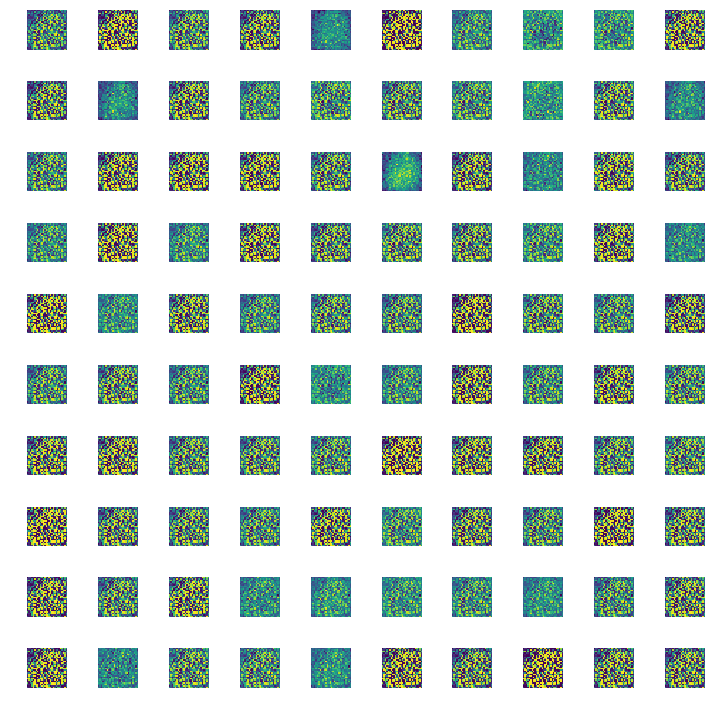

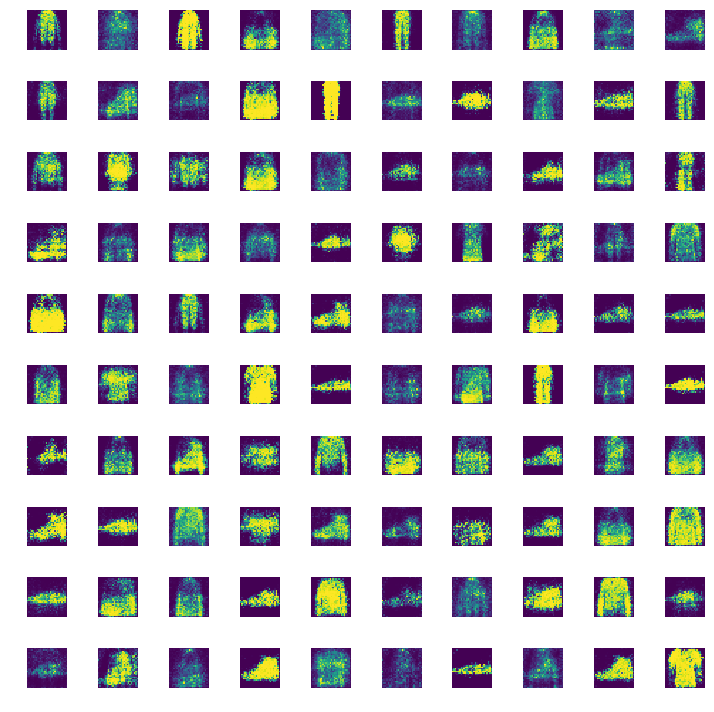

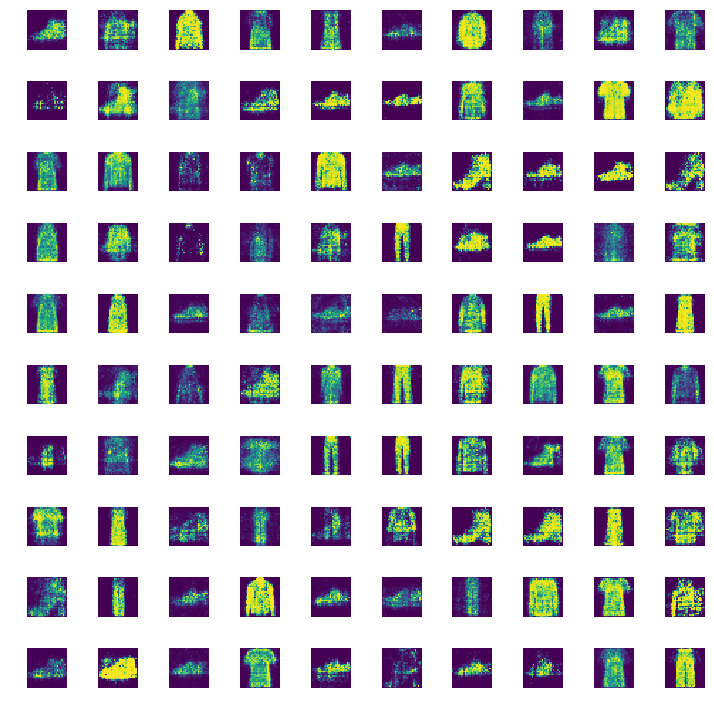

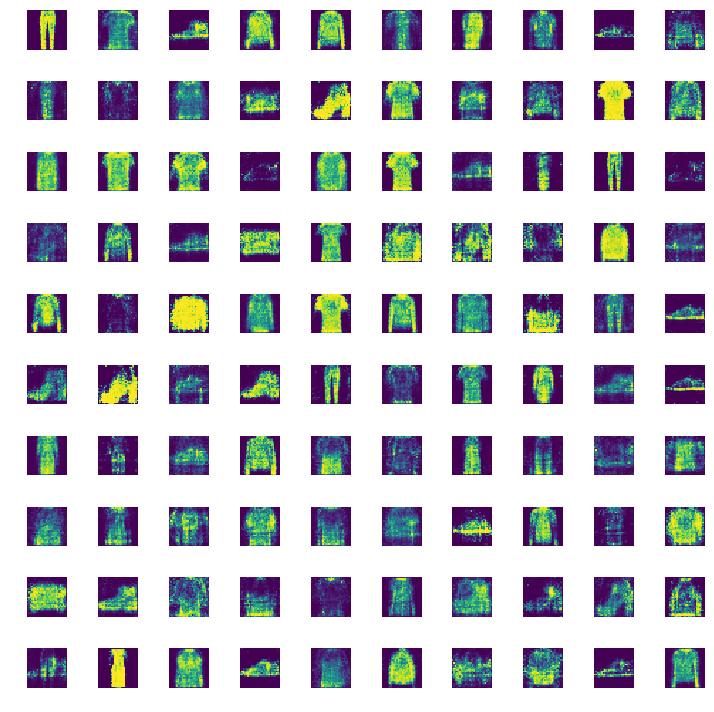

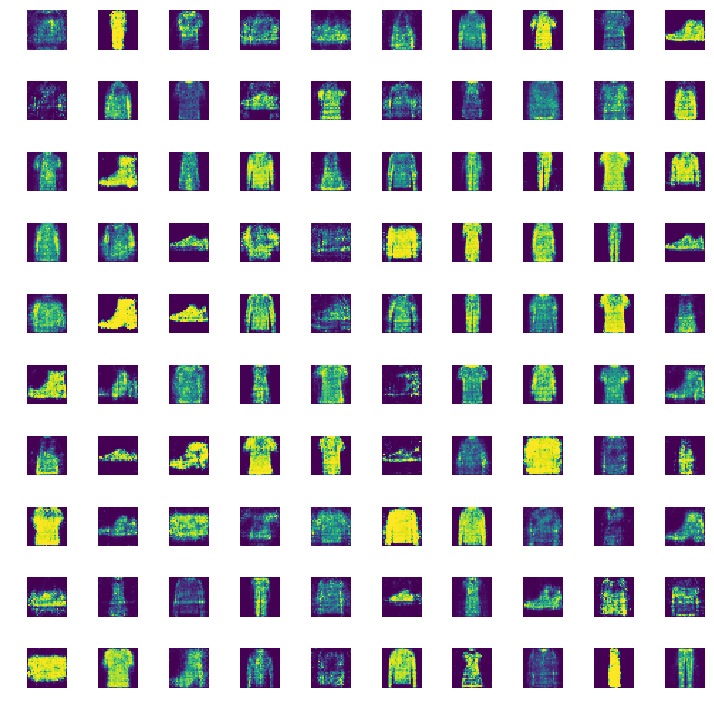

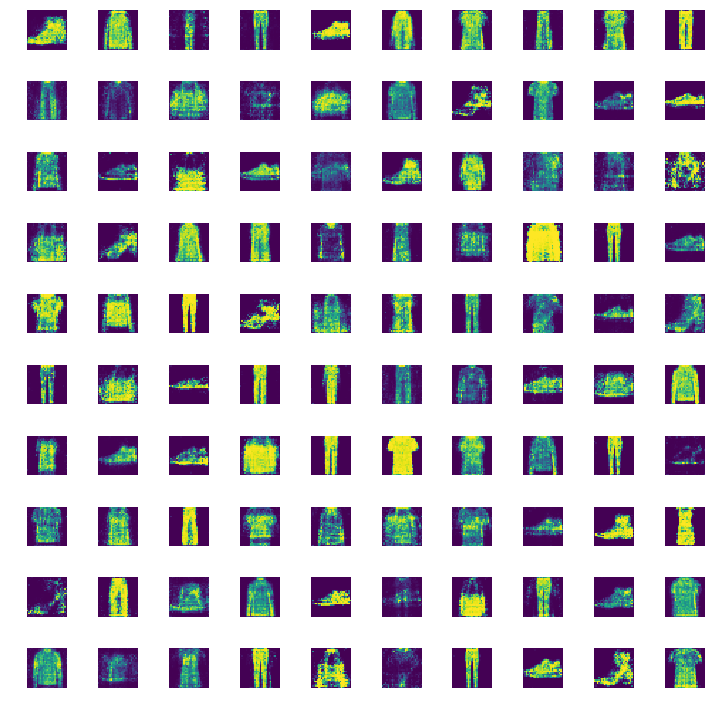

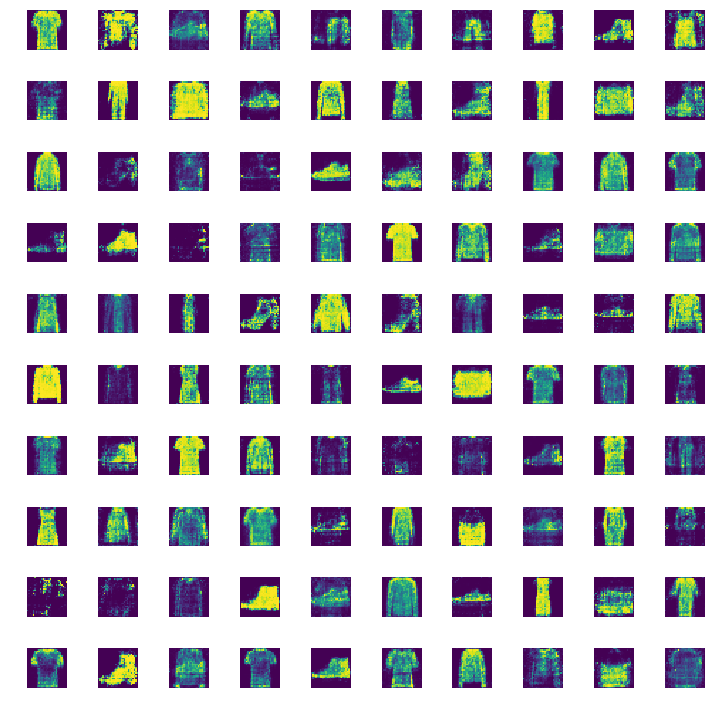

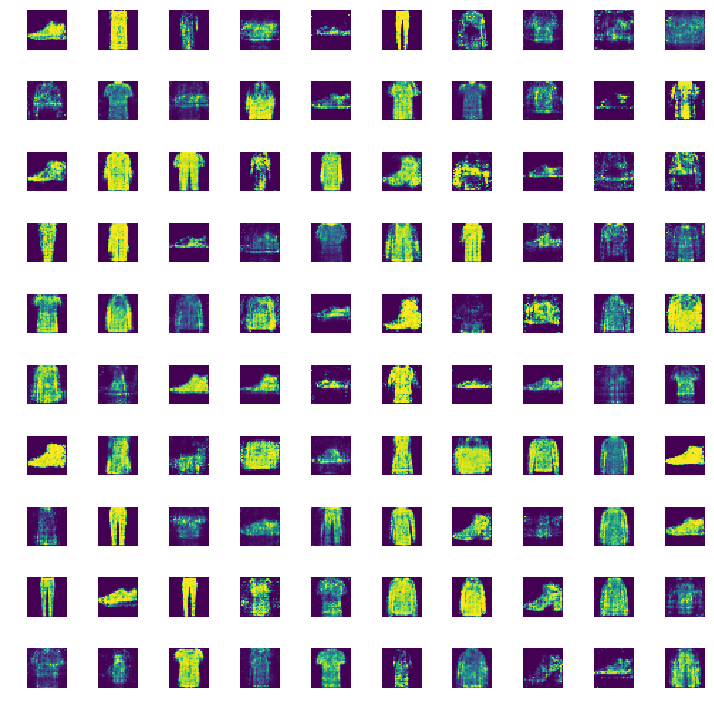

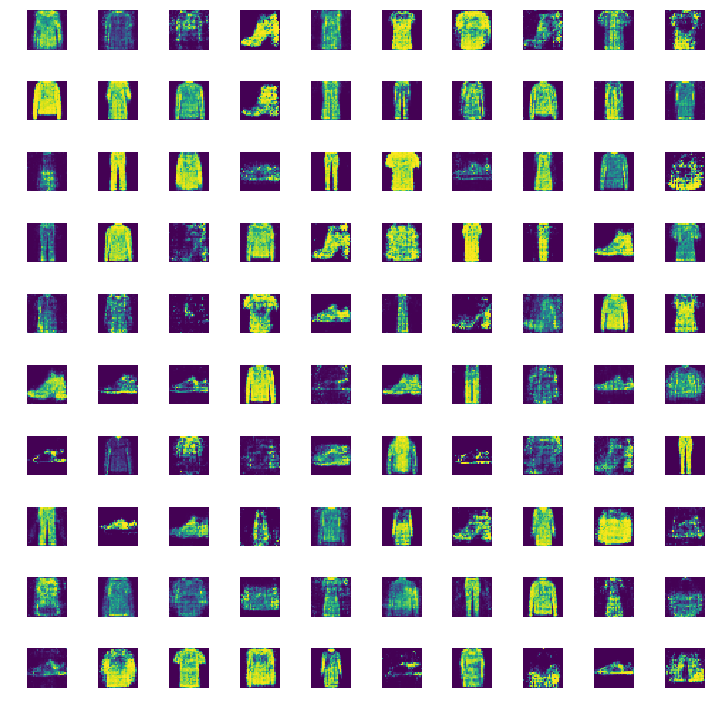

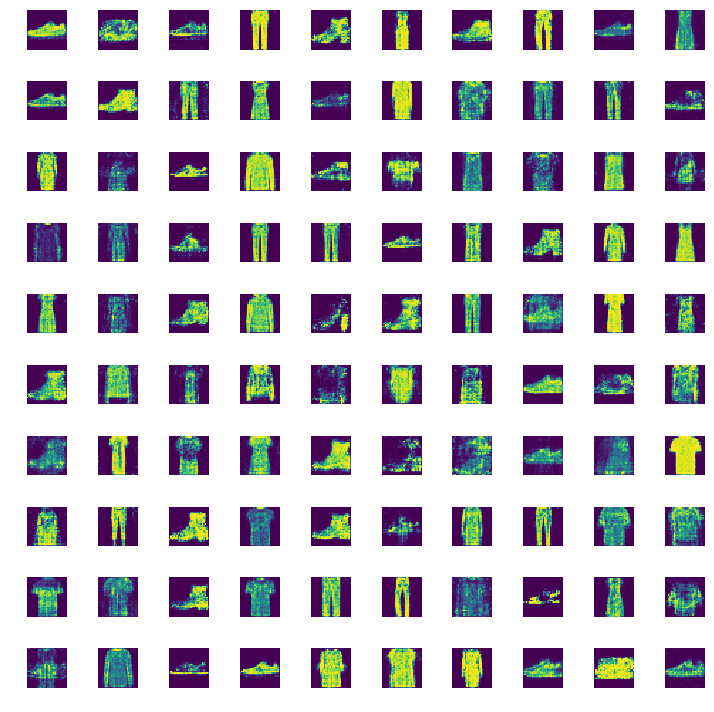

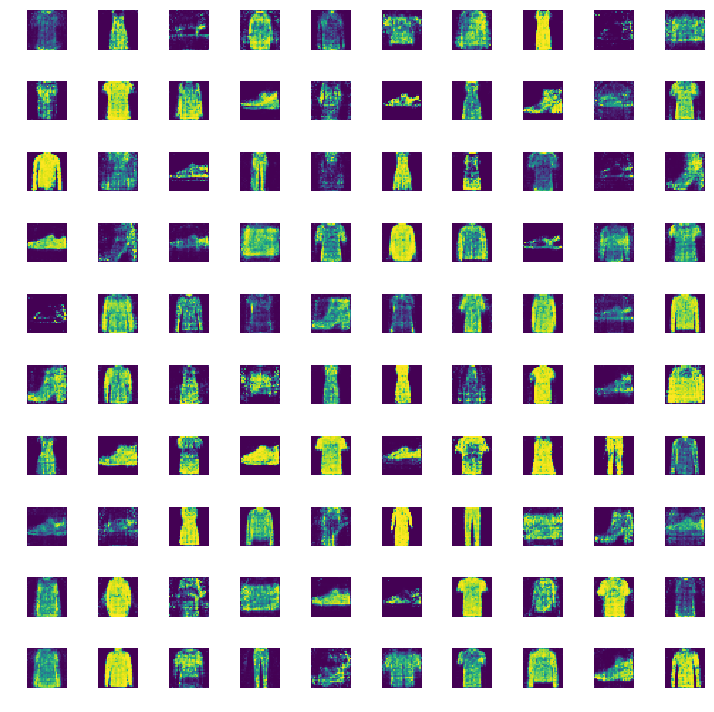

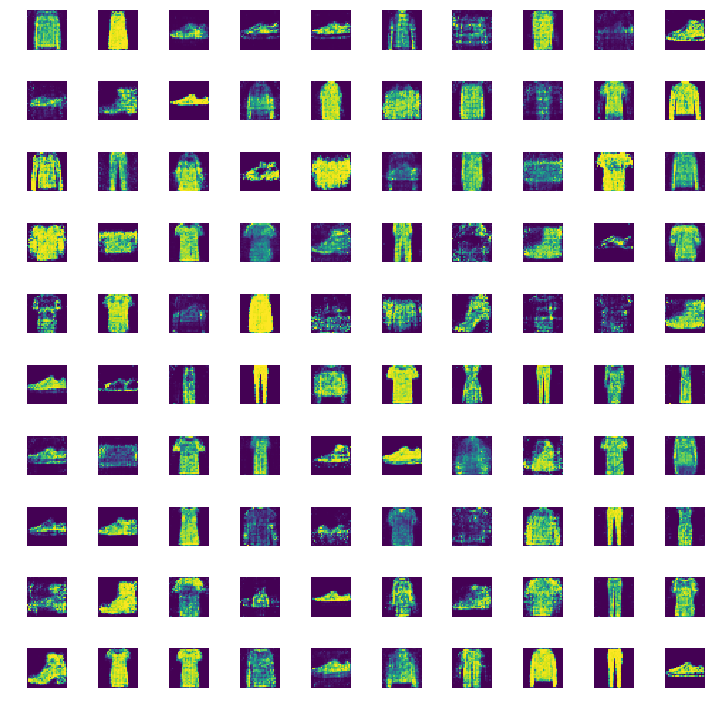

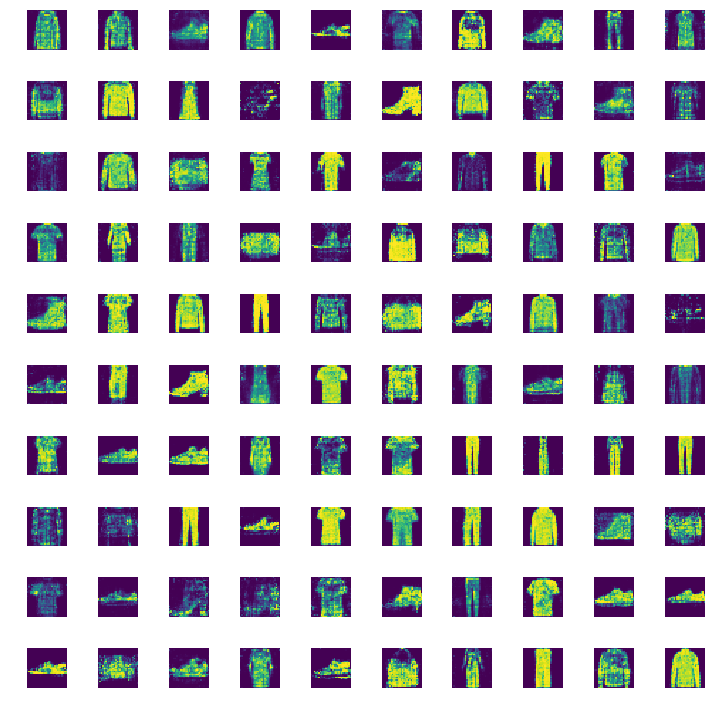

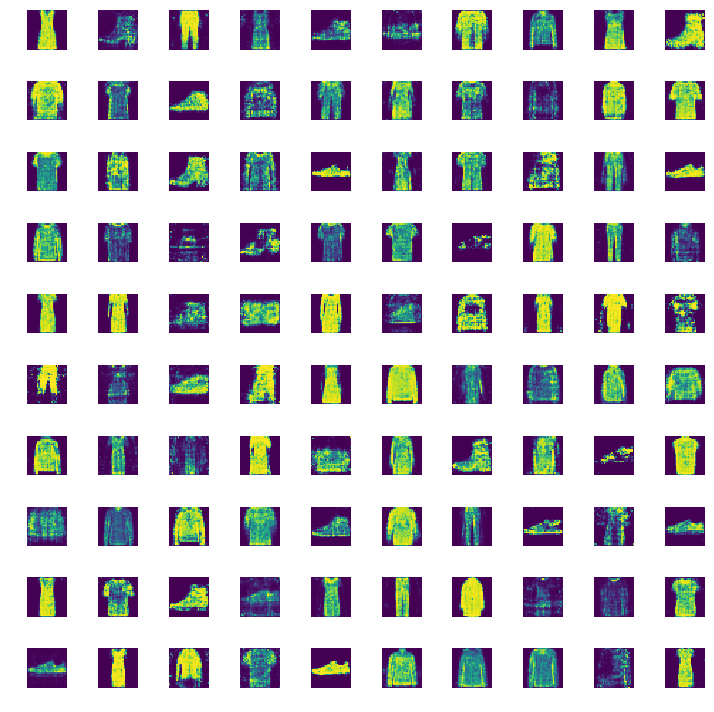

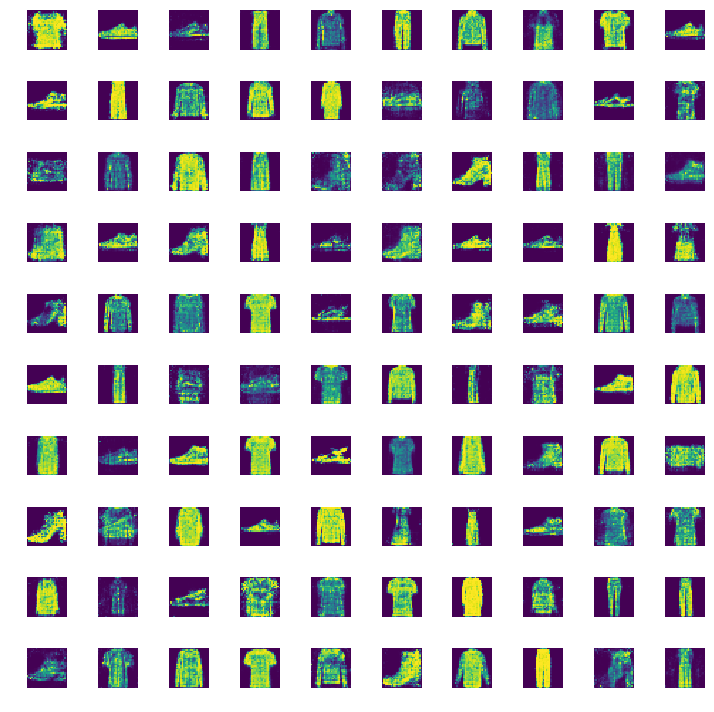

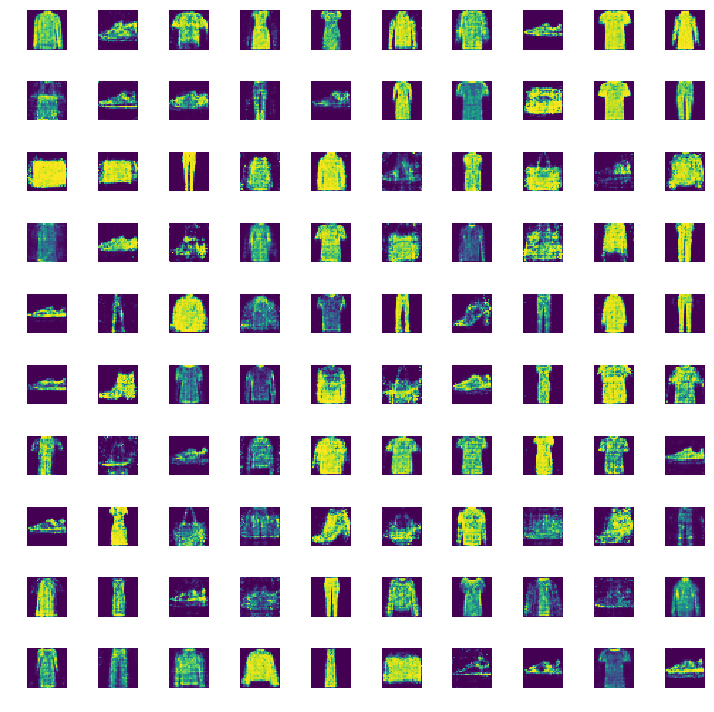

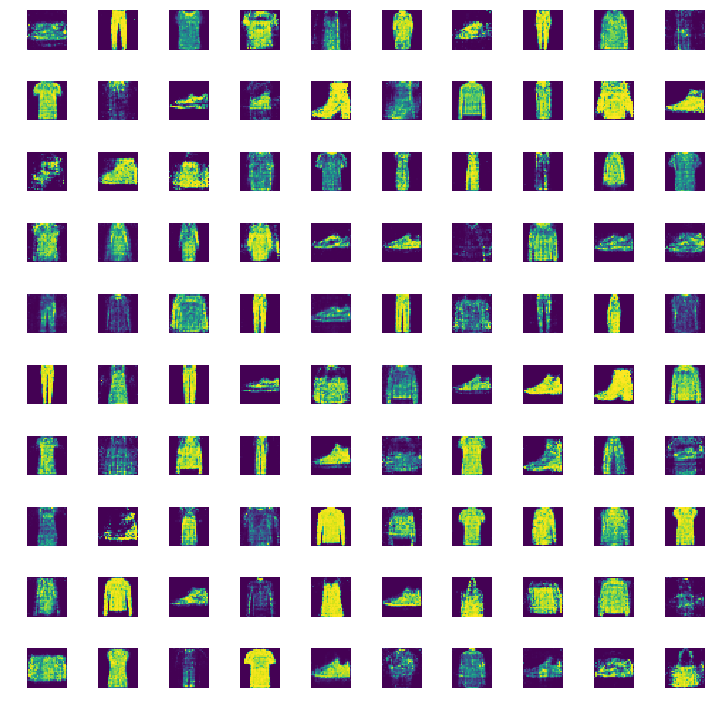

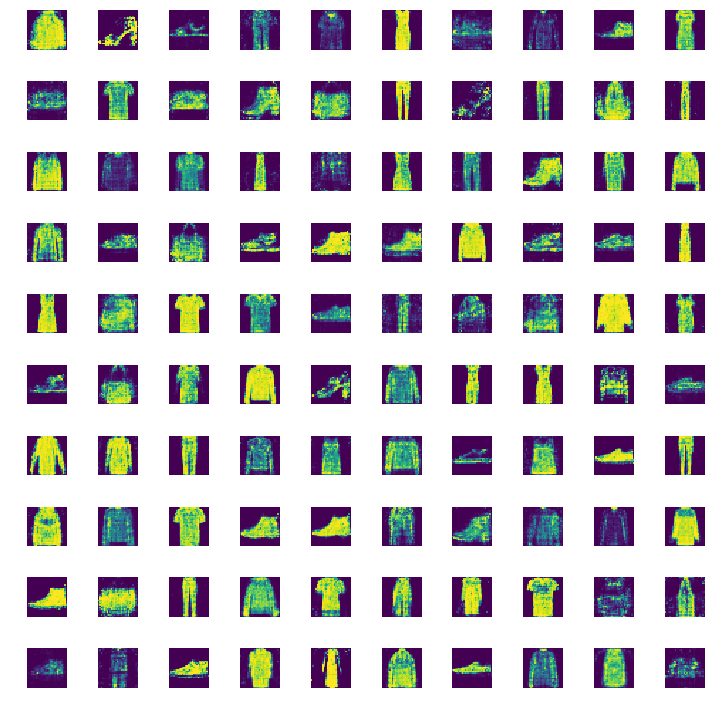

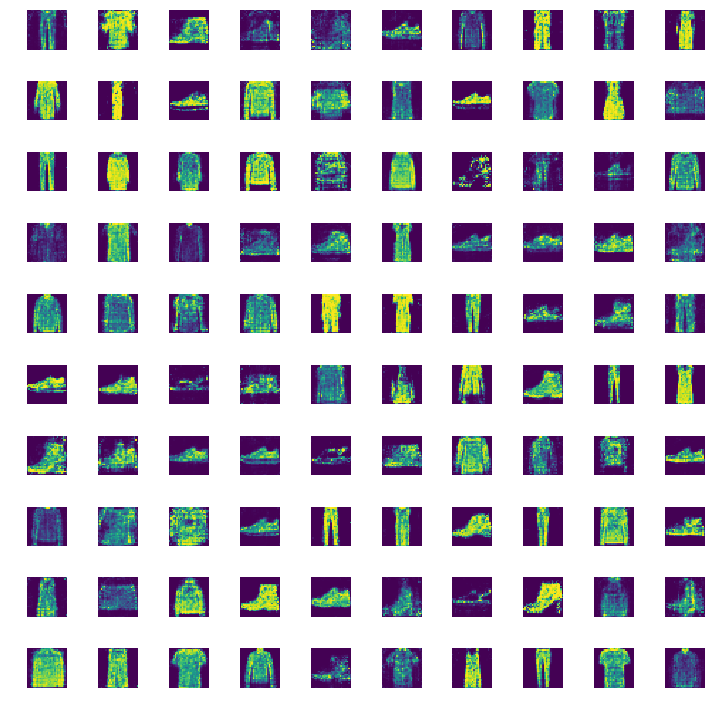

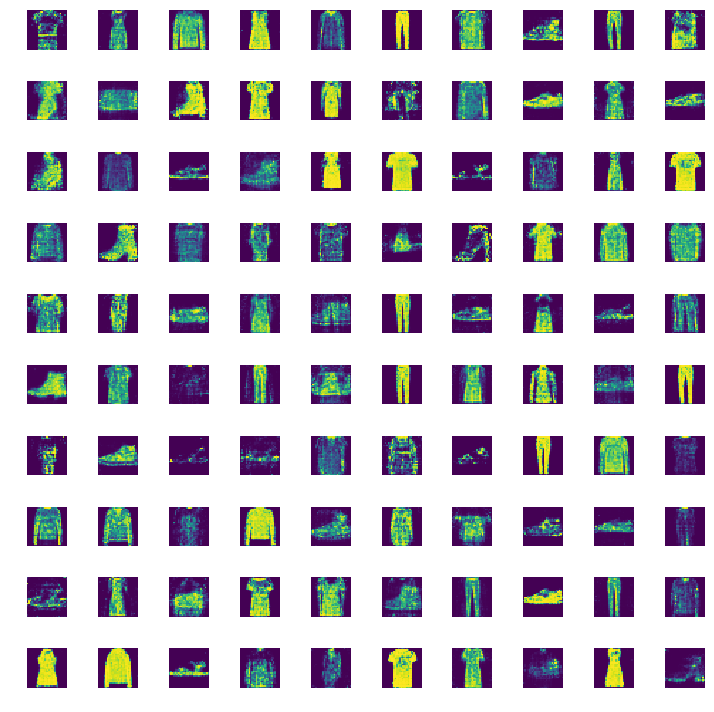

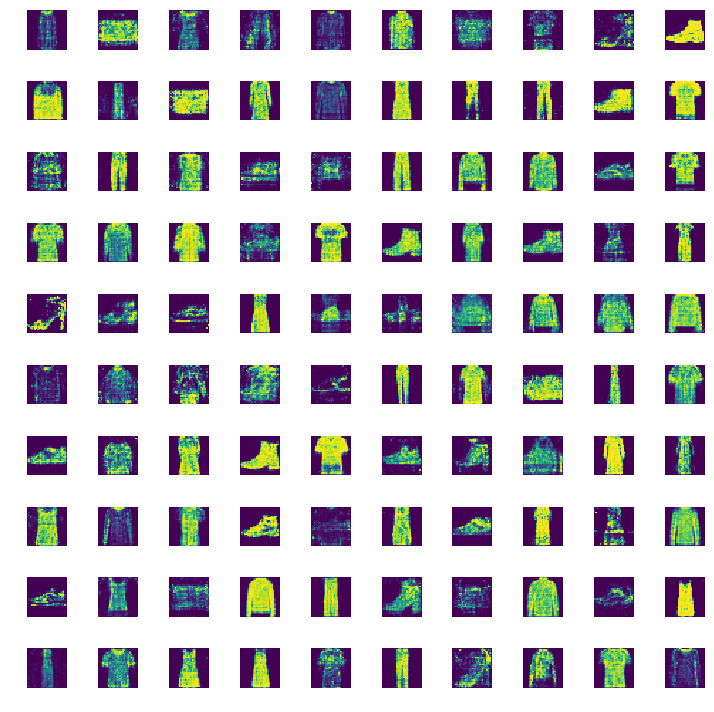

In [14]:
def training(epochs=1, batch_size=128):
    
    #Loading the data
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if e == 1 or e % 20 == 0:
           
            plot_generated_images(e, generator)
training(400,128)